<a href="https://colab.research.google.com/github/gittEze/KNearestNeighbors_PredictTitanicSurvival/blob/main/16_Predicci%C3%B3n_de_supervivencia_en_el_Titanic_con_K_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparación de los datos

En este ejercicio vamos a trabajar con la preparación previa de los datos.

Para esto tenemos lo siguiente, un dataset con:

* Age: Contiene un 15% de valores faltantes (nulos) y un 2% de valores atípicos (edades negativas).
* Income: Contiene un 3% de valores faltantes (nulos).
* Education: Contiene un 70% de valores faltantes (nulos).
* Filas duplicadas: El 10% de las filas son duplicadas.

## Paso 1

Importar pandas y leer el archivo csv

In [78]:
import pandas as pd
df = pd.read_csv('train.csv')

## Paso 2
Visualizar el formato de las 5 primeras filas.

La función utilizada es **head(n)**, donde **n** indica la cantidad de filas a mostrar (por defecto son 5).

In [79]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2.0
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,0.0
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,0.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,0.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,1.0


## Paso 3
Verificar el tamaño de filas y columnas que manejamos inicialmente

Para esto utilizamos el atributo shape de pandas, que devuelve una tupla (n_filas, n_columnas).

In [80]:
#Te muestra las filas y las columnas
df.shape

(891, 12)

# Paso 4
Verificamos la info() para identificar la cantidad de elementos por columna y su tipo (numérica o categórica)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


## Paso 5
Verificamos la cantidad de elementos faltantes por columna

Utilizamos la combinación de métodos isnull() y sum(), que cuentan los valores nulos por cada columna.

In [82]:
#Te dice la cantiada de datos nulos(NULL)
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Paso 6

### Preparación de los datos

Cuando te enfrentas a datos faltantes en un dataset, es fundamental decidir cómo manejarlos para no introducir sesgos o perder información valiosa.

1. Reemplazar (`.fillna()`) por la Media (Promedio): Utiliza la media para imputar datos faltantes cuando los valores están distribuidos de manera relativamente simétrica y no hay muchos outliers en la columna.
`.median()`

2. Reemplazar (`.fillna()`) por la Moda: Usa la moda cuando la columna es categórica o cuando un valor es particularmente frecuente y su uso no distorsionará el análisis.
`.mode()[0]`

3. Eliminar filas con elementos faltantes: Considera eliminar filas cuando:
Los valores faltantes son pocos en relación con el tamaño del dataset.
Las filas con datos faltantes no aportan información crucial.

`df.dropna(inplace=True)                  # Elimina cualquier fila con NaN`

`df.dropna(subset=['Class'], inplace=True) # Elimina solo si falta en 'Class'
`

4. Eliminar columnas casi vacías: Elimina columnas completas cuando:
La mayoría de los valores en la columna son nulos (por ejemplo, más del 65%).
La columna no parece tener una relación fuerte con las demás o con la variable dependiente `.drop(columns='')`


Con `ad.isnull().sum()` visualizamos los cambios



In [83]:
#df.dropna(subset=['Sex'], inplace=True)
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [84]:
df.drop(columns=['Cabin'], inplace=True)
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [85]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isnull().sum()

/tmp/ipython-input-1025092037.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [86]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df.isnull().sum()

/tmp/ipython-input-4086271142.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Paso 7

Para eliminarlos utilizamos el método drop_duplicates()

In [87]:
print("Cantidad de filas antes de eliminar duplicado", df.shape)

df.drop_duplicates(inplace=True)
print("Cantidad de filas después de eliminar duplicado", df.shape)

Cantidad de filas antes de eliminar duplicado (891, 11)
Cantidad de filas después de eliminar duplicado (891, 11)


## Paso 8

Para chequear outliers, podemos hacerlo de la siguiente forma:

Boxplot (Diagrama de Cajas):
Visualiza la distribución de los datos y destaca los outliers como puntos fuera de la caja (rango intercuartílico).

Ejemplo: `plt.boxplot(df['Age'])`.

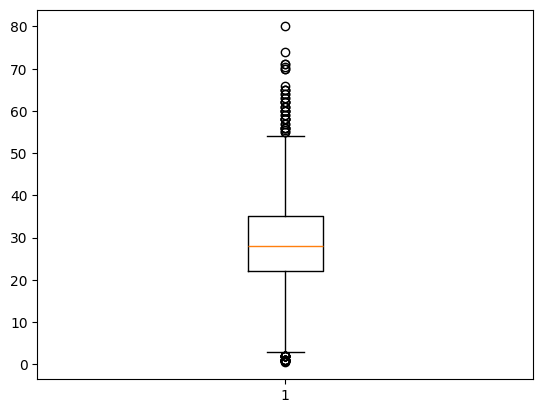

In [88]:
import matplotlib.pyplot as plt
plt.boxplot(df['Age'])
plt.show()

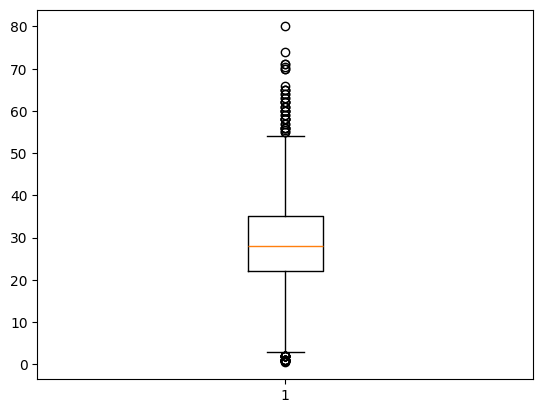

In [89]:
# Eliminamos del dataset las filas donde la columna Age tenga valores menores
# o iguales a 0, ya que no representan edades válidas.
df = df[df['Age']>0]
plt.boxplot(df['Age'])
plt.show()

## Paso 8

Definir Características (Features):

Selecciona las columnas que serán las variables independientes (predictoras) en tu modelo.
Ejemplo: `caracteristicas = ['column1', 'column2']`.
Asignar Variables Independientes (X):

Extrae las columnas seleccionadas del DataFrame para formar la matriz de características X.
Ejemplo: `X = data[caracteristicas]`.
Asignar Variable Dependiente (y):

Define la columna que será la variable objetivo (dependiente), que el modelo intentará predecir.
Ejemplo: `y = data['column3']`.

In [90]:
caracteristicas = ['Sex', 'Pclass', 'Age']

X = df[caracteristicas]
y = df['Survived']

## Paso 9

 Importar la función train_test_split desde sklearn
`from sklearn.model_selection import train_test_split`

Dividir el dataset en conjuntos de entrenamiento y validación

`X`: características (variables independientes)

`y`: variable dependiente (objetivo)

`test_size=0.2`: El 20% de los datos se reservará para la validación

`X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)`

`X_train`: Características para el entrenamiento (80% del dataset)

`X_val`: Características para la validación (20% del dataset)

`y_train`: Etiquetas correspondientes a X_train

`y_val`: Etiquetas correspondientes a X_val


In [92]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

## Paso 10

Importar StandardScaler

`from sklearn.preprocessing import StandardScaler.`

Crear una Instancia del Escalador

`scaler = StandardScaler()`.

Ajustar y Transformar los Datos de Entrenamiento

`fit_transform(X_train)`: Ajusta el escalador a los datos de entrenamiento y luego los transforma. Esto asegura que las estadísticas (media, desviación estándar) se calculan solo en el conjunto de entrenamiento.


Transformar los Datos de Validación

`transform(X_val)`: Aplica la misma transformación a los datos de validación, utilizando las estadísticas calculadas a partir del conjunto de entrenamiento.

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

## Paso 11

```
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
```



* `KNeighborsClassifier`: Crea un modelo KNN con 3 vecinos.
* `fit(X_train, y_train)`: Entrena el modelo con los datos de entrenamiento.
* `predict(X_val)`: Realiza predicciones en el conjunto de validación.
* `accuracy_score(y_val, y_pred)`: Calcula la exactitud de las predicciones comparando las predicciones (y_pred) con las etiquetas reales (y_val).
* `print('Exactitud en el conjunto de validación:', accuracy)`: Muestra la exactitud calculada en la salida.

In [98]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier(n_neighbors=5)
modelo.fit(X_train, y_train)

predict = modelo.predict(X_val)

accuracy = accuracy_score(y_val, predict)
print('Exactitud en el conjunto de validación:', accuracy)

Exactitud en el conjunto de validación: 0.776536312849162


In [104]:
test_data = pd.read_csv('test.csv')

test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [106]:
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 36.1+ KB


/tmp/ipython-input-1082772415.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Age'].fillna(test_data['Age'].median(), inplace=True)


In [107]:
X_val = test_data[caracteristicas]
X_val = scaler.transform(X_val)
predictions = modelo.predict(X_val)
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})
output.to_csv('submission3.csv', index=False)
